# Tracer une carte en Python

Le notebook propose plusieurs façons de tracer une cartes en Python.

Il y a principalement trois façons de tracer une carte. La première est statique avec des modules comme [basemap](https://matplotlib.org/basemap/) ou [cartopy](http://scitools.org.uk/cartopy/) qui sont des surcouches de [matplotlib](https://matplotlib.org/). Le second moyen est une carte animée ou non dans un notebook avec des modules comme [pygal](http://www.pygal.org/en/stable/documentation/types/maps/pygal_maps_world.html), [plotly](https://plot.ly/python/choropleth-maps/). La dernière consiste à insérer des éléments sur une carte en ligne telle que [OpenStreetMap](https://www.openstreetmap.org/) et le module [folium](https://github.com/python-visualization/folium) ou [ipyleaflet](https://github.com/ellisonbg/ipyleaflet).

Il y a souvent trois problèmes avec les cartes. Le premier sont avec les coordonnées. Les plus utilisées sont les coordonnées [longitude / latitude](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_g%C3%A9ographiques). Le problème est chaque pays a son propre système adapté à sa position géographique. Il faut souvent convertir (voir [lambert93_to_WGPS](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/ensae_teaching_cs/helpers/geo_helper.html?highlight=basemap#ensae_teaching_cs.helpers.geo_helper.lambert93_to_WGPS), [pyproj](https://jswhit.github.io/pyproj/)). Le second problème est l'ajout de repères géographiques (frontières, fleuves, ...). Certains modules contiennent certaines informations, souvent pour les Etats-Unis. Mais souvent, il faut récupérer ces informations sur les sites open data de chaque pays : [départements français](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td1a_cenonce_session_12.html?highlight=basemap#cartes-avec-les-departements). La troisième difficulté est qu'on veut tracer des cartes très chargées et cela prend un temps fou.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## données

In [3]:
from papierstat.datasets import load_enedis_dataset
df = load_enedis_dataset()
df.head(n=2).T

,0,1
Année,2016,2016
Nom commune,Ponteilla,Varreddes
Code commune,66145,77483
Nom EPCI,CU Perpignan Méditerranée (Pmcu),CA Pays de Meaux
Code EPCI,200027183,247700628
Type EPCI,CU,CA
Nom département,Pyrénées-Orientales,Seine-et-Marne
Code département,66,77
Nom région,Occitanie,Île-de-France
Code région,76,11


## basemap

c:\Python364_x64\lib\site-packages\mpl_toolkits\basemap\__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
c:\Python364_x64\lib\site-packages\mpl_toolkits\basemap\__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


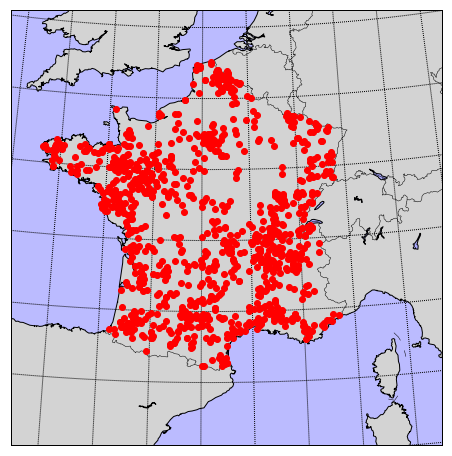

In [4]:
from mpl_toolkits.basemap import Basemap
import numpy

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8,8))

m = Basemap(llcrnrlon=-5, llcrnrlat=40, urcrnrlon=13, urcrnrlat=52,
            resolution='i', projection='cass', lon_0=2.34, lat_0=48,
            ax=axes)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')

m.drawparallels(numpy.arange(-40,61.,2.))
m.drawmeridians(numpy.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='#BBBBFF')

for ind, lat, lon in df[['lat', 'long']][:1000].itertuples():
    x,y = m(lon, lat)  # la conversion opère ici
    m.plot(x, y, 'ro', markersize=6)
    # ax.text(x, y, "Paris")

## plotly

Il faut s'authentifier.

## kartograph

[kartograph](http://www.kartograph.org/)

## folium

In [5]:
import folium
map_osm = folium.Map(location=[48.85, 2.34])

for ind, lat, lon, com in df[['lat', 'long', 'Nom commune']][:50].itertuples():
    map_osm.add_child(folium.RegularPolygonMarker(location=[lat,lon], popup=com,
                       fill_color='#132b5e', radius=5))

map_osm